In [28]:
import pandas as pd
from prophet import Prophet
from CONSTANTS import DATA_PATH

In [29]:
data = pd.read_csv(DATA_PATH + "btc_daily_data_with_features.csv", index_col=0, parse_dates=True)

# Clean data
data = data.dropna()
data = data.drop(columns=["Year", "Month", "Day"])
data.sort_index(inplace=True)

print(f"Data shape: {data.shape}")
print(f"Data columns: {data.columns}")
print(f"Data NaNs: {data.isna().sum()}")

data.head()

Data shape: (4645, 11)
Data columns: Index(['open', 'high', 'low', 'close', 'volume', 'Weekday', 'rsi', 'sma_50',
       'sma_200', 'macd', 'volatility'],
      dtype='object')
Data NaNs: open          0
high          0
low           0
close         0
volume        0
Weekday       0
rsi           0
sma_50        0
sma_200       0
macd          0
volatility    0
dtype: int64


,open,high,low,close,volume,Weekday,rsi,sma_50,sma_200,macd,volatility
2012-04-04,5.04,5.04,4.86,4.99,244.0,2,51.370026,4.8924,5.01090,-0.027411,0.18
2012-04-05,4.92,5.01,4.86,5.01,305.0,3,52.007078,4.8948,4.98145,-0.018055,0.15
2012-04-06,4.99,5.04,4.89,5.00,400.0,4,51.642798,4.9010,4.94800,-0.011318,0.15
2012-04-07,4.90,4.99,4.81,4.99,725.0,5,51.256161,4.9106,4.91445,-0.006707,0.18
2012-04-08,4.94,4.94,4.70,4.70,228.0,6,41.542747,4.9112,4.87945,-0.026153,0.24


In [30]:
prophet_df = data.copy()
prophet_df = prophet_df['close'].reset_index()
prophet_df.rename(columns={"index": "ds", "close": "y"}, inplace=True)
prophet_df.head()

,ds,y
0,2012-04-04,4.99
1,2012-04-05,5.01
2,2012-04-06,5.00
3,2012-04-07,4.99
4,2012-04-08,4.70


In [31]:
additional_features = [
    "open",
    "high",
    "low",
    "volume",
    "rsi",
    "sma_50",
    "sma_200",
    "macd",
    "volatility",
]
for feature in additional_features:
    prophet_df[feature] = data[feature].values

model = Prophet()
for feature in additional_features:
    model.add_regressor(feature)

model.fit(prophet_df)

13:45:20 - cmdstanpy - INFO - Chain [1] start processing
13:45:22 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
from prophet.diagnostics import cross_validation, performance_metrics

# `initial` define el tamaño del conjunto de entrenamiento inicial
# `period` define la frecuencia de las evaluaciones
# `horizon` define el horizonte de predicción (10 días en este caso)
cv_results = cross_validation(model, initial='365 days', period='30 days', horizon='10 days')

# Métricas de rendimiento
performance = performance_metrics(cv_results)

# Mostrar las métricas
print(performance)

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/143 [00:00<?, ?it/s]

13:45:22 - cmdstanpy - INFO - Chain [1] start processing
13:45:22 - cmdstanpy - INFO - Chain [1] done processing
13:45:22 - cmdstanpy - INFO - Chain [1] start processing
13:45:23 - cmdstanpy - INFO - Chain [1] done processing
13:45:23 - cmdstanpy - INFO - Chain [1] start processing
13:45:23 - cmdstanpy - INFO - Chain [1] done processing
13:45:23 - cmdstanpy - INFO - Chain [1] start processing
13:45:23 - cmdstanpy - INFO - Chain [1] done processing
13:45:23 - cmdstanpy - INFO - Chain [1] start processing
13:45:23 - cmdstanpy - INFO - Chain [1] done processing
13:45:23 - cmdstanpy - INFO - Chain [1] start processing
13:45:23 - cmdstanpy - INFO - Chain [1] done processing
13:45:24 - cmdstanpy - INFO - Chain [1] start processing
13:45:24 - cmdstanpy - INFO - Chain [1] done processing
13:45:24 - cmdstanpy - INFO - Chain [1] start processing
13:45:24 - cmdstanpy - INFO - Chain [1] done processing
13:45:24 - cmdstanpy - INFO - Chain [1] start processing
13:45:24 - cmdstanpy - INFO - Chain [1]

  horizon            mse        rmse         mae      mape     mdape  \
0  1 days  110925.618098  333.054978  172.929646  0.015232  0.007754   
1  2 days  113411.036730  336.765552  160.005116  0.017084  0.007051   
2  3 days  121917.552327  349.166940  174.317735  0.015042  0.007907   
3  4 days  146001.668878  382.101647  192.215309  0.018047  0.008572   
4  5 days  147370.763805  383.888999  164.025965  0.013775  0.008186   
5  6 days  184309.152046  429.312418  195.356713  0.014146  0.008636   
6  7 days   88640.363104  297.725315  151.793352  0.013879  0.007348   
7  8 days  143425.432260  378.715503  160.822114  0.014220  0.007878   
8  9 days   99507.972746  315.448843  157.291585  0.014760  0.007120   
9 10 days  139073.786312  372.925980  166.663423  0.013980  0.007501   

      smape  coverage  
0  0.015678  0.605634  
1  0.016595  0.690141  
2  0.015415  0.626761  
3  0.018741  0.559441  
4  0.014023  0.629371  
5  0.014624  0.650350  
6  0.014194  0.692308  
7  0.014464  0.

c:\Users\lucas\python-envs\bitcoin-predictor-system\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\lucas\python-envs\bitcoin-predictor-system\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


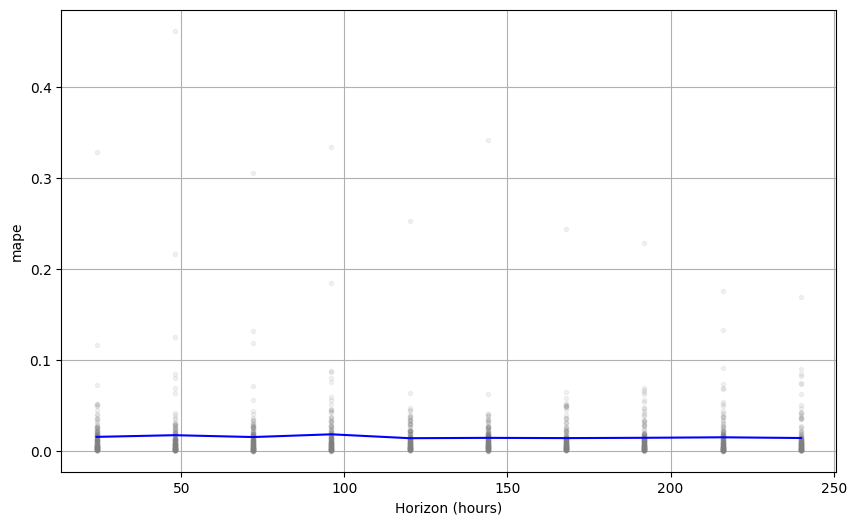

In [35]:
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(cv_results, metric='mape')

In [34]:
from fastapi import FastAPI
import pandas as pd

app = FastAPI()

# Cargar el modelo y datos
model = Prophet()
model.fit(data_prophet)

@app.get("/predict")
def predict():
    future = model.make_future_dataframe(periods=30, freq='D')
    forecast = model.predict(future)
    return forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(30).to_dict()

NameError: name 'data_prophet' is not defined